# Global Power Plant Database

# Problem Statement:

# Description

# The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Fuel Type Aggregation
# We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Find the dataset link below. 

In [139]:
# import necessary libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
data = pd.read_csv(r"D:\New folder\database_IND.csv")

In [142]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
#Lets check the shape of dataset
data.shape

(907, 27)

So , here we have 907 rows and 27 columns

# Data is Duplicated ?

In [144]:
data.duplicated().sum()

0

so,  here we have 0 Duplicated Data

In [145]:
#Lets check the data type of dataset
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

so here we have

only float columns
and object columns

In [146]:
#Checking the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are 12 object and 13 numerical columns in data

# Remove some columns those having maximum  null values

In [147]:
data.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [148]:
data.shape

(907, 22)

In [149]:
#Checking null values in dataset
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

# Remove MAxmium null value present columns

In [150]:
data.drop(['owner','generation_gwh_2019','generation_gwh_2013','generation_gwh_2014'],axis=1,inplace=True)

In [151]:
data.shape

(907, 18)

In [152]:
#Checking value counts of target column
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

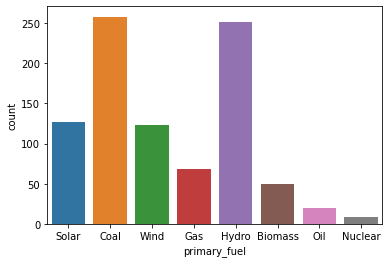

In [153]:
sns.countplot(x='primary_fuel',data=data)
plt.show()

In [154]:
#Checking description of dataset
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,30539.000000,30015.000000,35116.000000,35136.000000


In [155]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [156]:
data['country'].value_counts()

IND    907
Name: country, dtype: int64

In [157]:
data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [158]:
# drop unnecessary columns

In [159]:
data.drop(['country','country_long'],axis=1,inplace=True)

In [160]:
data.drop(['url'],axis=1,inplace=True)

In [161]:
data.shape

(907, 15)

# Basic Analysis with Visualisation

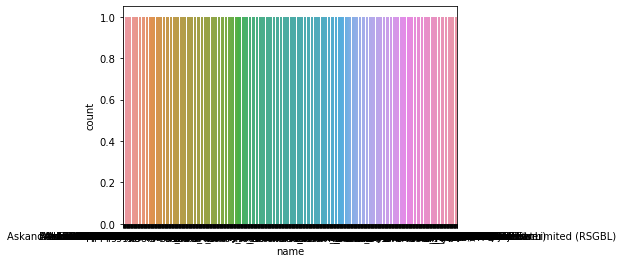

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [162]:
#Lets plot name data .Using count plot
sns.countplot(x='name',data=data)
plt.show()
data['name'].value_counts()

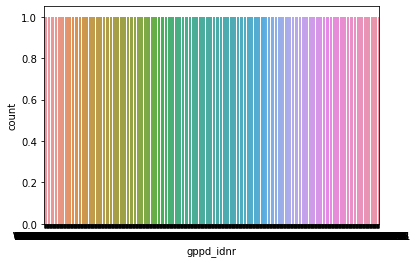

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [163]:
#Lets plot gppd_idnr data .Using count plot
sns.countplot(x='gppd_idnr',data=data)
plt.show()
data['gppd_idnr'].value_counts()

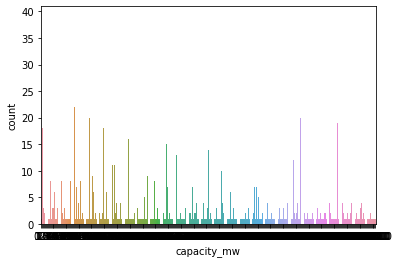

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [164]:
#Lets plot capacity_mw data .Using count plot
sns.countplot(x='capacity_mw',data=data)
plt.show()
data['capacity_mw'].value_counts()

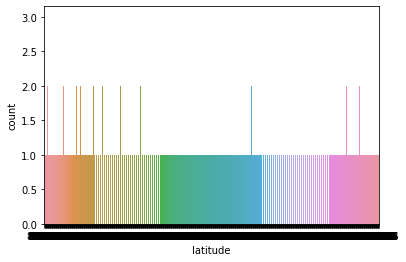

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [165]:
#Lets plot latitude data .Using count plot
sns.countplot(x='latitude',data=data)
plt.show()
data['latitude'].value_counts()

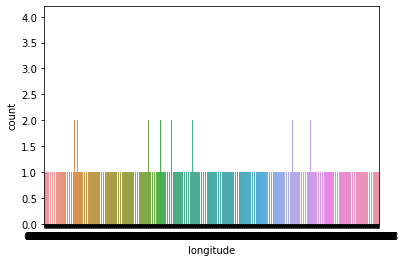

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [166]:
#Lets plot longitude data .Using count plot
sns.countplot(x='longitude',data=data)
plt.show()
data['longitude'].value_counts()

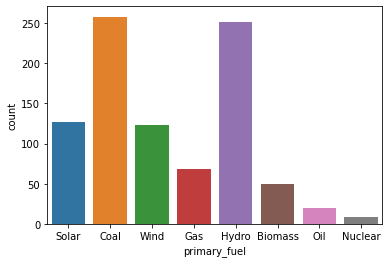

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [167]:
#Lets plot primary_fuel data .Using count plot
sns.countplot(x='primary_fuel',data=data)
plt.show()
data['primary_fuel'].value_counts()

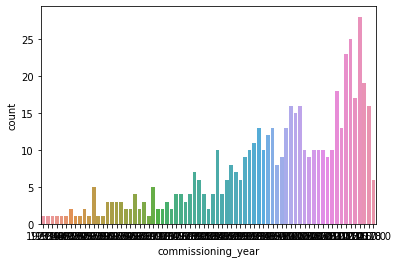

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [168]:
#Lets plot commissioning_year data .Using count plot
sns.countplot(x='commissioning_year',data=data)
plt.show()
data['commissioning_year'].value_counts()

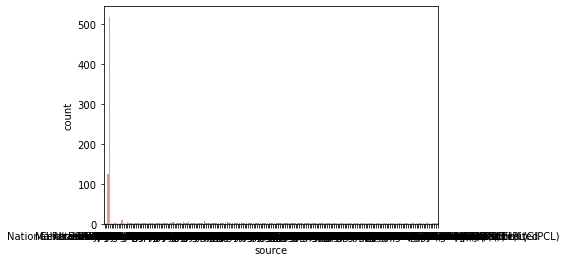

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [169]:
#Lets plot source data .Using count plot
sns.countplot(x='source',data=data)
plt.show()
data['source'].value_counts()

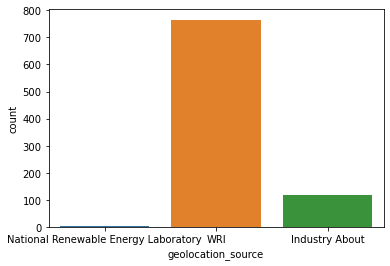

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [170]:
#Lets plot geolocation_source data .Using count plot
sns.countplot(x='geolocation_source',data=data)
plt.show()
data['geolocation_source'].value_counts()

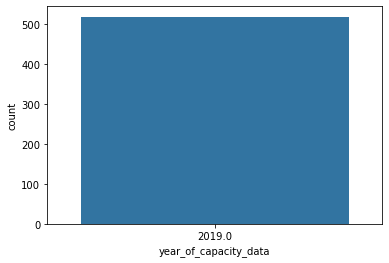

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [171]:
#Lets plot year_of_capacity_data data .Using count plot
sns.countplot(x='year_of_capacity_data',data=data)
plt.show()
data['year_of_capacity_data'].value_counts()

In [172]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

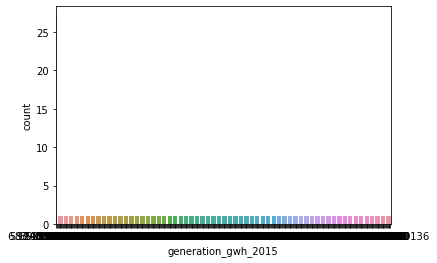

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [173]:
#Lets plot generation_gwh_2015 data .Using count plot
sns.countplot(x='generation_gwh_2015',data=data)
plt.show()
data['generation_gwh_2015'].value_counts()

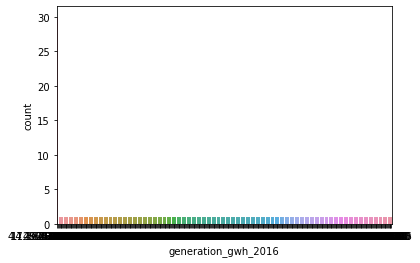

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [174]:
#Lets plot generation_gwh_2016 data .Using count plot
sns.countplot(x='generation_gwh_2016',data=data)
plt.show()
data['generation_gwh_2016'].value_counts()

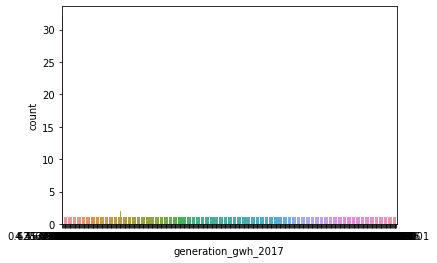

0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [175]:
#Lets plot generation_gwh_2017 data .Using count plot
sns.countplot(x='generation_gwh_2017',data=data)
plt.show()
data['generation_gwh_2017'].value_counts()

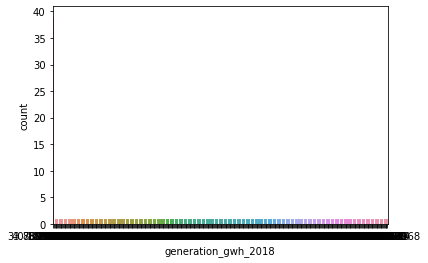

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [176]:
#Lets plot generation_gwh_2018 data .Using count plot
sns.countplot(x='generation_gwh_2018',data=data)
plt.show()
data['generation_gwh_2018'].value_counts()

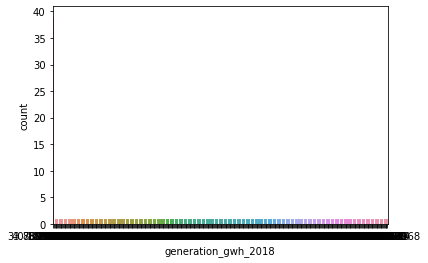

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [177]:
#Lets plot generation_gwh_2018 data .Using count plot
sns.countplot(x='generation_gwh_2018',data=data)
plt.show()
data['generation_gwh_2018'].value_counts()

In [178]:
data.drop(['gppd_idnr'],axis=1,inplace=True)

In [179]:
data.shape

(907, 14)

# Fill the Null Values

In [180]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])

In [181]:
data.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# * EDA (Exploratory data analysis)

In [182]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI,2019.0,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI,2019.0,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

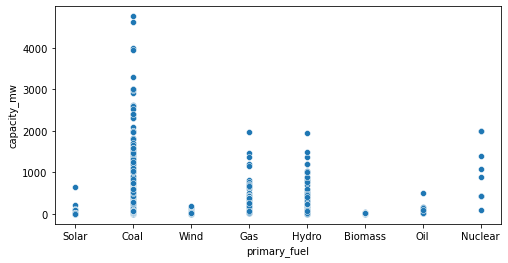

In [183]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

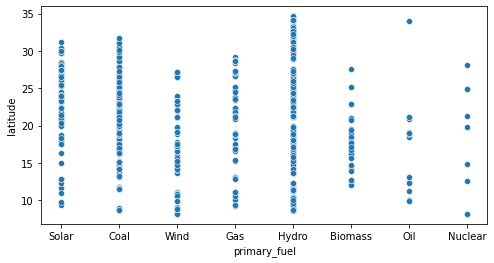

In [184]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

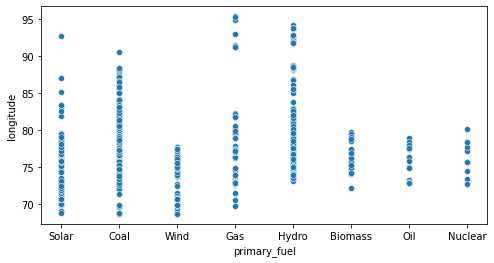

In [185]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='longitude',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

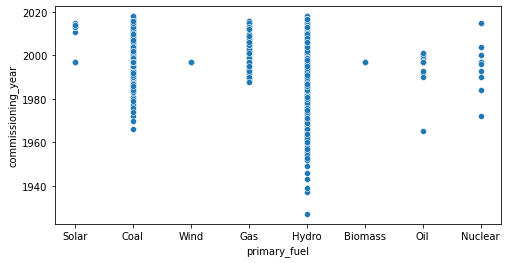

In [186]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='commissioning_year',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='source'>

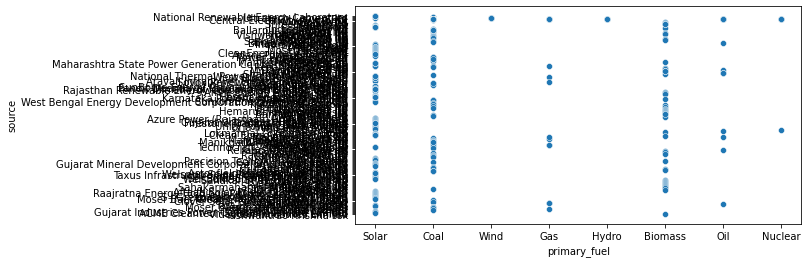

In [187]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='source',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

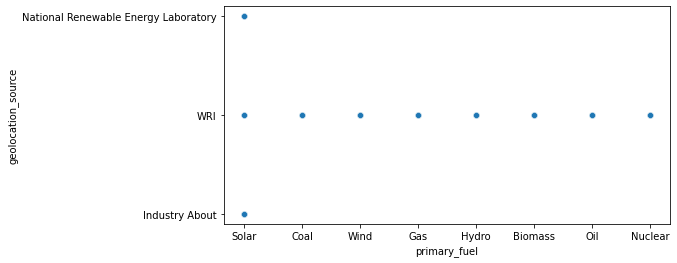

In [188]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='geolocation_source',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='year_of_capacity_data'>

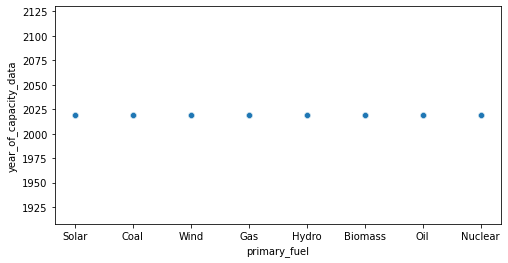

In [189]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='year_of_capacity_data',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

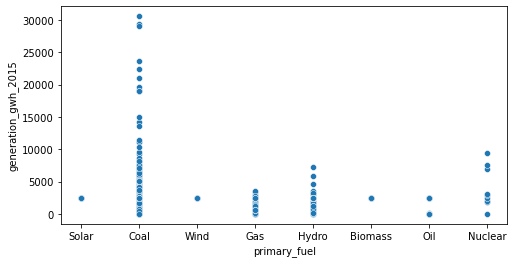

In [190]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=data)

we can here the coal is most used fuel in 2015 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

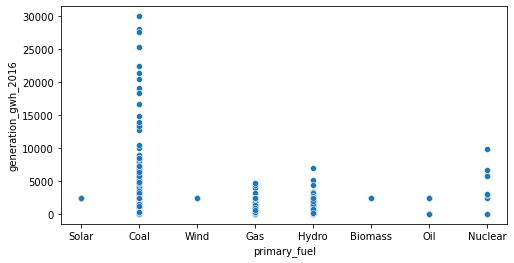

In [191]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=data)

we can here the coal is most used fuel in 2016 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

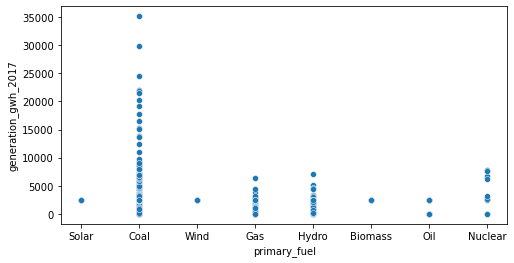

In [192]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=data)

we can here the coal is most used fuel in 2017 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

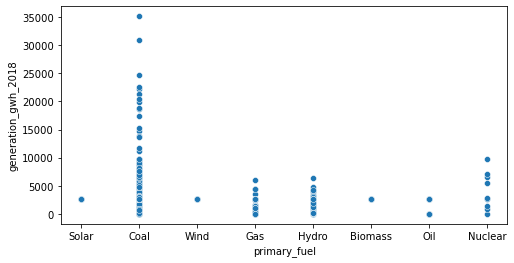

In [193]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=data)

In all of the year 2018 the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_data_source'>

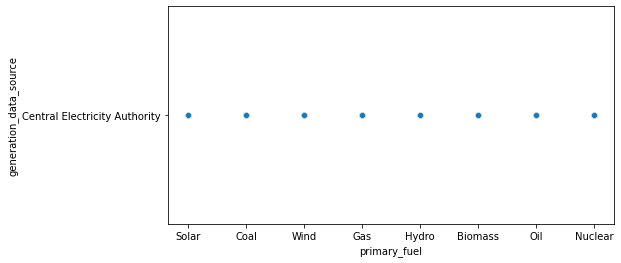

In [194]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_data_source',data=data)

# Using LabelEncoder for convering categorical to numerical


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                907 non-null    float64
 3   longitude               907 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   commissioning_year      907 non-null    float64
 6   source                  907 non-null    object 
 7   geolocation_source      907 non-null    object 
 8   year_of_capacity_data   907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(9), object(5)
memory usage: 99.

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
lab_enc=LabelEncoder()

In [198]:
df1 = lab_enc.fit_transform(data['name'])
pd.Series(df1)

0        0
1        1
2        2
3        3
4        4
      ... 
902    902
903    903
904    904
905    905
906    906
Length: 907, dtype: int32

In [199]:
df2 = lab_enc.fit_transform(data['primary_fuel'])
pd.Series(df2)

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Length: 907, dtype: int32

In [200]:
df3 = lab_enc.fit_transform(data['source'])
pd.Series(df3)

0      109
1      174
2       21
3       22
4       22
      ... 
902     22
903     77
904     21
905     59
906     21
Length: 907, dtype: int32

In [201]:
df4 = lab_enc.fit_transform(data['geolocation_source'])
pd.Series(df4)

0      1
1      2
2      2
3      2
4      2
      ..
902    2
903    0
904    2
905    2
906    2
Length: 907, dtype: int32

In [202]:
df5 = lab_enc.fit_transform(data['generation_data_source'])
pd.Series(df5)

0      0
1      0
2      0
3      0
4      0
      ..
902    0
903    0
904    0
905    0
906    0
Length: 907, dtype: int32

In [203]:
data['name']=df1
data['primary_fuel']=df2
data['source']=df3
data['geolocation_source']=df4
data['generation_data_source']=df5

In [204]:
data

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,6,2011.000000,109,1,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0
1,1,98.0,24.7663,74.6090,1,1997.091082,174,2,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0
2,2,39.2,21.9038,69.3732,7,1997.091082,21,2,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0
3,3,135.0,23.8712,91.3602,2,2004.000000,22,2,2019.0,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,1,2015.000000,22,2,2019.0,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,77.3568,1,2016.000000,22,2,2019.0,0.994875,233.596650,865.400000,686.500000,0
903,903,3.0,12.8932,78.1654,6,1997.091082,77,0,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0
904,904,25.5,15.2758,75.5811,7,1997.091082,21,2,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0
905,905,80.0,24.3500,73.7477,1,1997.091082,59,2,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0


In [205]:
data.shape

(907, 14)

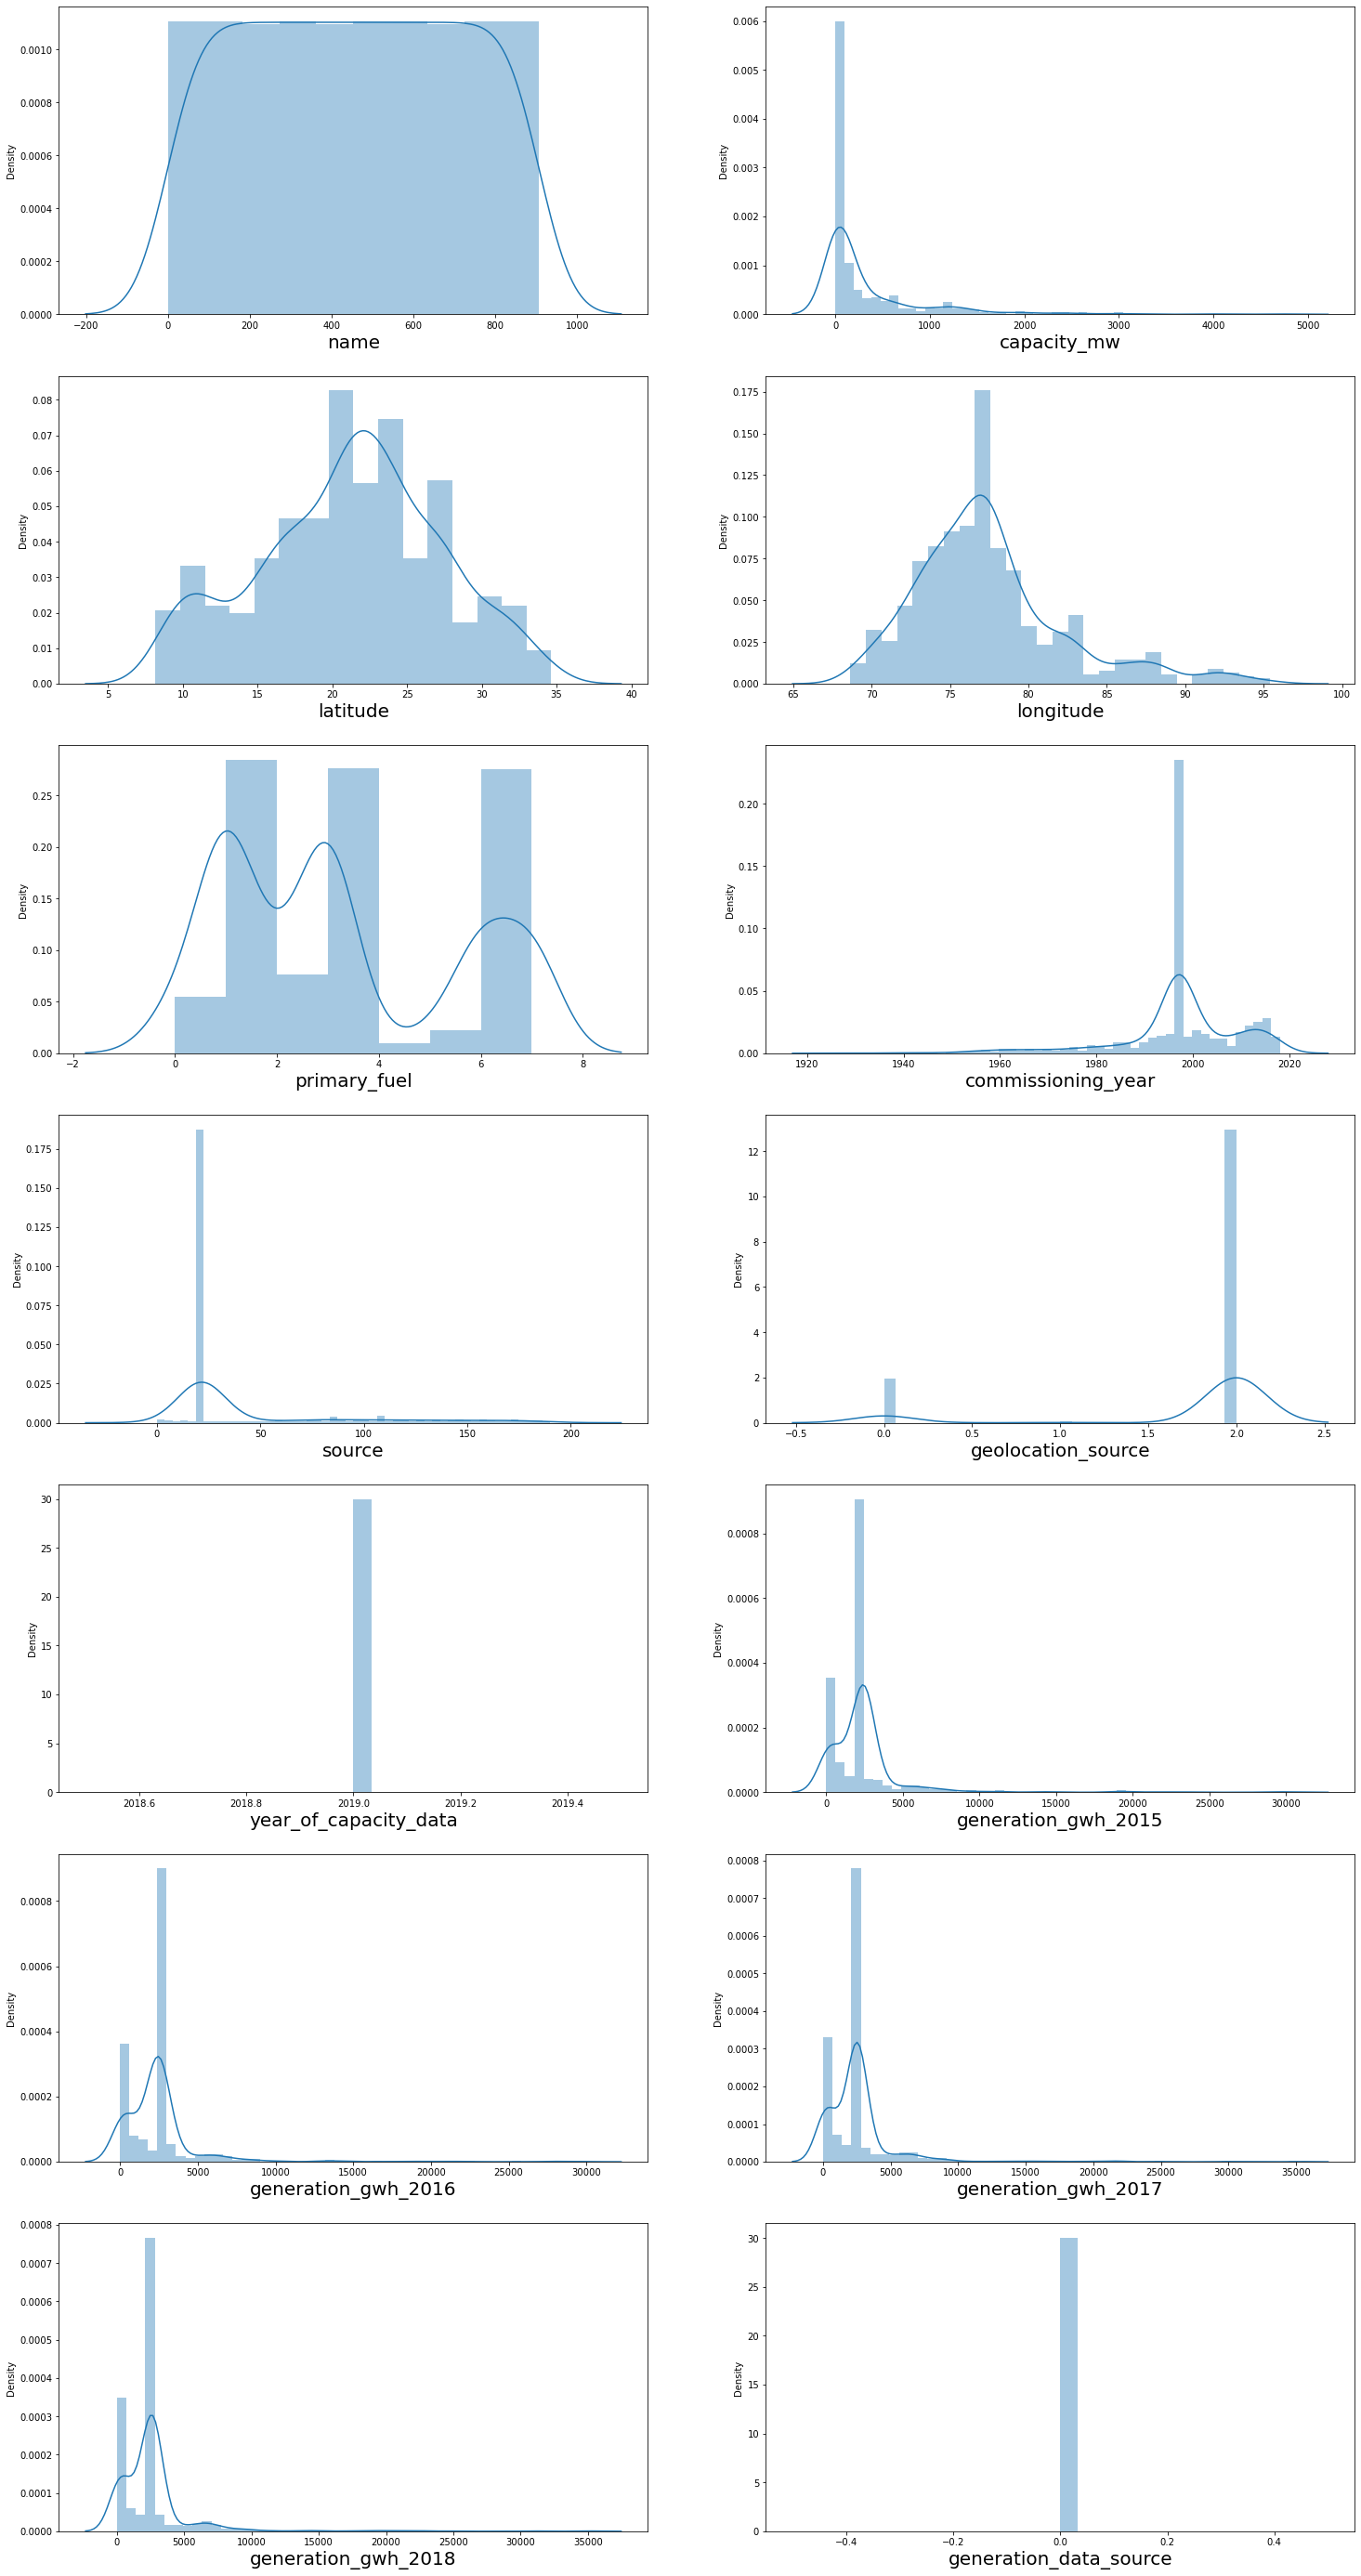

In [206]:
plt.figure(figsize=(25,50))
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,source,commissioning_year,capacity_mw,longitude. there are not normal distribution then Almost all the columns are normally distributed

# * BOXPLOT

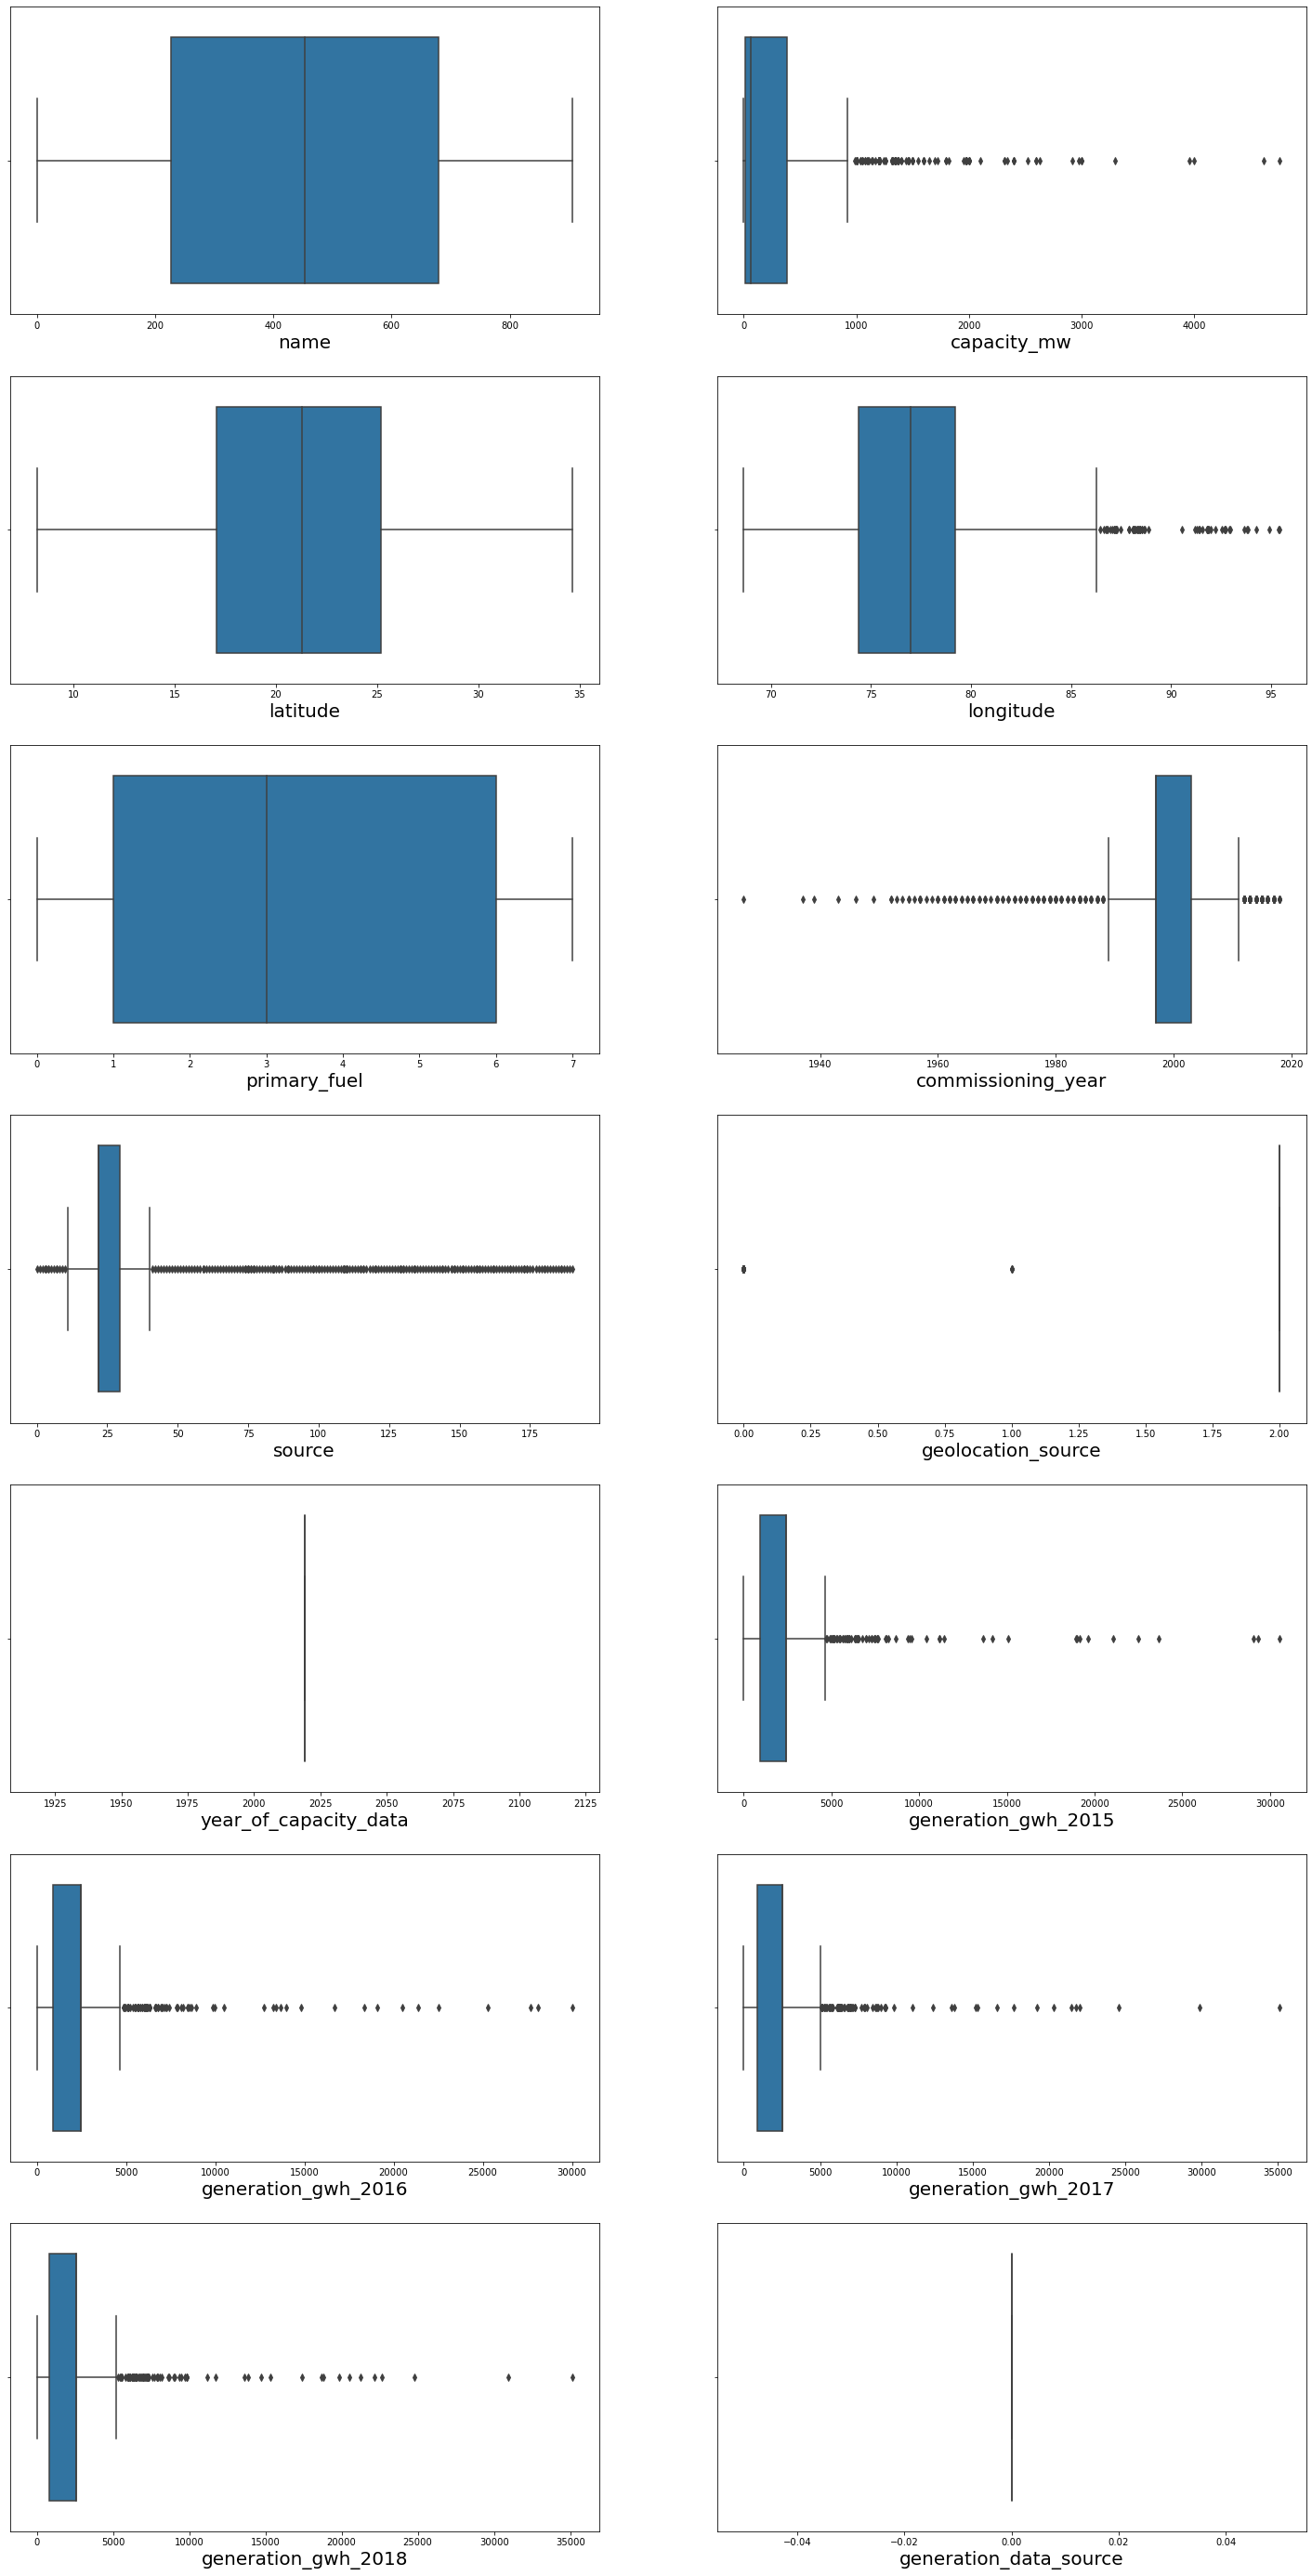

In [207]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in data:
    if plotnumber <=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

As shown in boxplot.

generation_gwh_2018,2017,2016,2015 and source,Commissioning year,longitude,capacity_mw in this column outliers present.

So,we need remove outliers from that the input variables.

# Removing Outliers:

# Zscore method:

In [208]:
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','source','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2015']])
abs_z_score=np.abs(z_score)

In [209]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.0
mean,446.483832,274.931666,21.107093,77.068142,3.288623,1997.907969,42.718563,1.724551,2019.0,2150.948252,2187.169658,2257.930353,2287.589093,0.0
std,263.188498,429.273355,6.138324,4.308467,2.315996,11.235843,42.114223,0.686148,0.0,1563.676834,1615.390510,1660.448799,1711.557897,0.0
min,0.000000,0.000000,8.168900,68.644700,0.000000,1959.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,217.500000,16.500000,16.924300,74.283300,1.000000,1997.091082,22.000000,2.000000,2019.0,940.480500,922.937275,918.304500,868.610000,0.0
50%,443.000000,54.000000,21.208300,76.781700,3.000000,1997.091082,22.000000,2.000000,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,674.500000,348.750000,25.141650,78.928400,6.000000,2003.000000,31.500000,2.000000,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,906.000000,2000.000000,34.649000,91.823900,7.000000,2018.000000,177.000000,2.000000,2019.0,10422.690000,10503.882000,9833.690000,9861.136000,0.0


In [210]:
data.shape

(835, 14)

There are 835 rows and 14 columns of shape of new dataset after removing outliers.

# Checking for Skewness:

In [211]:
#Checking for Skewness
data.skew()

name                      0.026128
capacity_mw               1.951725
latitude                 -0.113160
longitude                 0.911191
primary_fuel              0.414053
commissioning_year       -0.843485
source                    1.786502
geolocation_source       -2.106224
year_of_capacity_data     0.000000
generation_gwh_2015       1.437280
generation_gwh_2016       1.425788
generation_gwh_2017       1.313633
generation_gwh_2018       1.358324
generation_data_source    0.000000
dtype: float64

In [212]:
from sklearn.preprocessing import power_transform

data[['capacity_mw','longitude','commissioning_year',"generation_gwh_2015",'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018',]]=power_transform(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
   

# Correlation using HEAT map:

In [213]:
# Checking the correlation between features and the target
cor = data.corr()
cor

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.008526,-0.148260,0.023881,0.049779,-0.026970,-0.033590,0.040418,NaN,0.022974,0.022376,0.042578,0.027663,NaN
capacity_mw,0.008526,1.000000,0.052245,0.342859,-0.536950,0.314141,-0.396630,0.478143,NaN,-0.007704,0.013875,0.013549,0.000952,NaN
latitude,-0.148260,0.052245,1.000000,-0.071071,-0.011145,0.110445,0.072134,-0.194068,NaN,0.044235,0.048313,0.027918,0.035091,NaN
longitude,0.023881,0.342859,-0.071071,1.000000,-0.417008,0.190252,-0.253730,0.308819,NaN,-0.136075,-0.095493,-0.107304,-0.101553,NaN
primary_fuel,0.049779,-0.536950,-0.011145,-0.417008,1.000000,-0.200866,0.063886,-0.470539,NaN,0.051752,0.041264,0.051713,0.052982,NaN
commissioning_year,-0.026970,0.314141,0.110445,0.190252,-0.200866,1.000000,-0.056199,0.062534,NaN,0.081997,0.130670,0.095545,0.092758,NaN
source,-0.033590,-0.396630,0.072134,-0.253730,0.063886,-0.056199,1.000000,-0.521363,NaN,0.176363,0.178241,0.178497,0.185885,NaN
geolocation_source,0.040418,0.478143,-0.194068,0.308819,-0.470539,0.062534,-0.521363,1.000000,NaN,-0.143913,-0.145446,-0.145654,-0.151683,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2015,0.022974,-0.007704,0.044235,-0.136075,0.051752,0.081997,0.176363,-0.143913,NaN,1.000000,0.906598,0.805417,0.815649,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'name'),
  Text(0, 1.5, 'capacity_mw'),
  Text(0, 2.5, 'latitude'),
  Text(0, 3.5, 'longitude'),
  Text(0, 4.5, 'primary_fuel'),
  Text(0, 5.5, 'commissioning_year'),
  Text(0, 6.5, 'source'),
  Text(0, 7.5, 'geolocation_source'),
  Text(0, 8.5, 'year_of_capacity_data'),
  Text(0, 9.5, 'generation_gwh_2015'),
  Text(0, 10.5, 'generation_gwh_2016'),
  Text(0, 11.5, 'generation_gwh_2017'),
  Text(0, 12.5, 'generation_gwh_2018'),
  Text(0, 13.5, 'generation_data_source')])

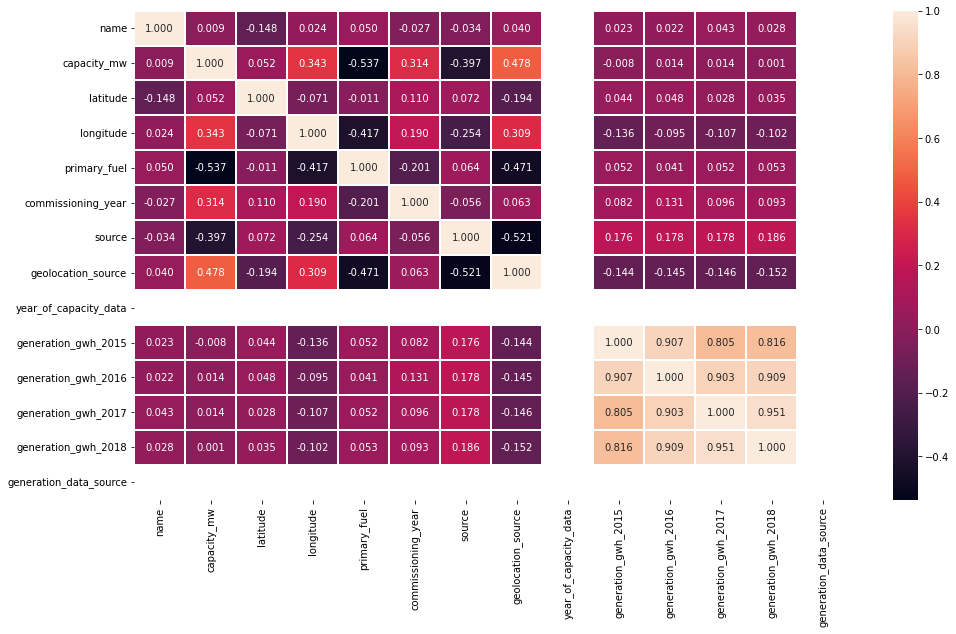

In [214]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [215]:
cor['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
source                    0.063886
generation_gwh_2018       0.052982
generation_gwh_2015       0.051752
generation_gwh_2017       0.051713
name                      0.049779
generation_gwh_2016       0.041264
latitude                 -0.011145
commissioning_year       -0.200866
longitude                -0.417008
geolocation_source       -0.470539
capacity_mw              -0.536950
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

# Visualizing the correlation between label and features using bar plot

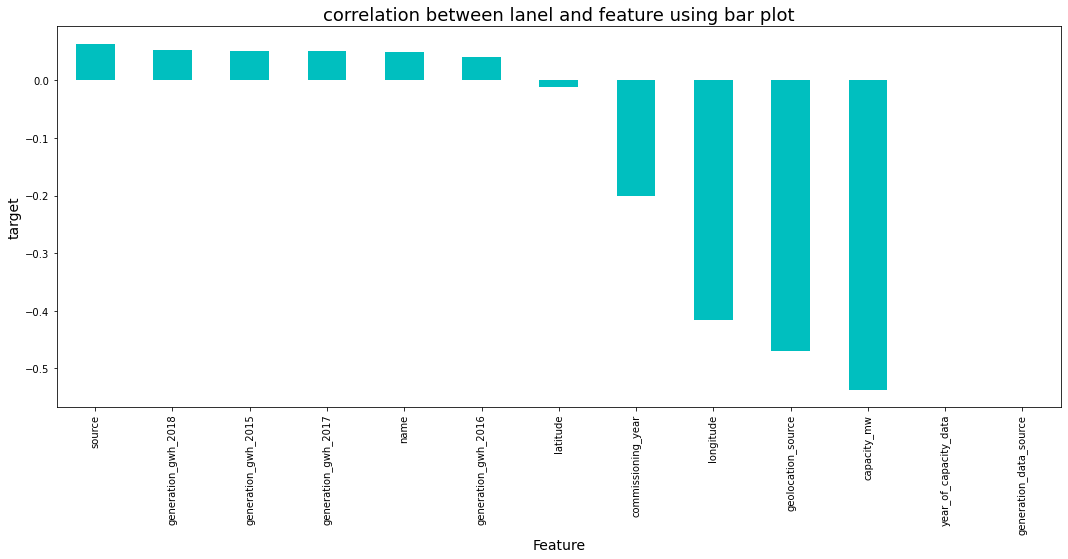

In [216]:
plt.figure(figsize=(18,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [217]:
data.drop(['generation_data_source'],axis=1,inplace=True)
data.drop(['year_of_capacity_data'],axis=1,inplace=True)

# Dividing data in feature and vectors

In [218]:
x=data.drop(columns='primary_fuel')#Feature
y=data.primary_fuel#Target

In [219]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.69745803, -1.67140651,  1.15358015, ...,  0.36209069,
         0.36260907,  0.37761835],
       [-1.69365619,  0.20738926,  0.59648211, ...,  0.36209069,
         0.36260907,  0.37761835],
       [-1.68985436, -0.28738658,  0.12987013, ...,  0.36209069,
         0.36260907,  0.37761835],
       ...,
       [ 1.73940115, -0.51907747, -0.95055057, ...,  0.36209069,
         0.36260907,  0.37761835],
       [ 1.74320299,  0.09796476,  0.52862165, ...,  0.36209069,
         0.36260907,  0.37761835],
       [ 1.74700482, -0.75163217, -1.82124446, ...,  0.36209069,
         0.36260907,  0.37761835]])

So, Here we can see that we removed alomost skewness .

# Now use VIF for checking multicollinearity problem

VIF - > Variance Inflation Factor

In [220]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [221]:
#Lets check how lookinf VIF score
vif

,vif,feature
0,1.028116,name
1,1.605780,capacity_mw
2,1.103584,latitude
3,1.220628,longitude
4,1.174409,commissioning_year
5,1.468905,source
6,1.692466,geolocation_source
7,5.760843,generation_gwh_2015
8,11.912411,generation_gwh_2016
9,11.611100,generation_gwh_2017


In [222]:
data.shape

(835, 12)

In [223]:
from imblearn.over_sampling import SMOTE

In [224]:
smt=SMOTE()
x_sample,_sample=smt.fit_resample(x,y)

# Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [226]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [227]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  25 The Model Performs Very Well
At random State  25 The Model performs very well
Training Accuracy Score is :-  49.101796407185624
Testing Accuracy Score is : -  49.101796407185624 

At Radom State  28 The Model Performs Very Well
At random State  28 The Model performs very well
Training Accuracy Score is :-  50.898203592814376
Testing Accuracy Score is : -  50.898203592814376 

At Radom State  35 The Model Performs Very Well
At random State  35 The Model performs very well
Training Accuracy Score is :-  50.898203592814376
Testing Accuracy Score is : -  50.898203592814376 

At Radom State  94 The Model Performs Very Well
At random State  94 The Model performs very well
Training Accuracy Score is :-  47.90419161676647
Testing Accuracy Score is : -  47.90419161676647 

At Radom State  138 The Model Performs Very Well
At random State  138 The Model performs very well
Training Accuracy Score is :-  50.898203592814376
Testing Accuracy Score is : -  50.898203592814376 

At Ra

For Logistic Regression we select Random State - 28

# Lets check with KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [229]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.6452095808383234
 At random state 0 , the testing accuracy is :- 0.40119760479041916


 At random state 1 , the testing accuracy is :- 0.6511976047904192
 At random state 1 , the testing accuracy is :- 0.437125748502994


 At random state 2 , the testing accuracy is :- 0.624251497005988
 At random state 2 , the testing accuracy is :- 0.4431137724550898


 At random state 3 , the testing accuracy is :- 0.6511976047904192
 At random state 3 , the testing accuracy is :- 0.4311377245508982


 At random state 4 , the testing accuracy is :- 0.6482035928143712
 At random state 4 , the testing accuracy is :- 0.46706586826347307


 At random state 5 , the testing accuracy is :- 0.6302395209580839
 At random state 5 , the testing accuracy is :- 0.5089820359281437


 At random state 6 , the testing accuracy is :- 0.657185628742515
 At random state 6 , the testing accuracy is :- 0.4550898203592814


 At random state 7 , the testing accuracy is :- 0

For KNN we select Random State - 65

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)

In [231]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [232]:
knn.score(x_train,y_train)#Training Score

0.625748502994012

In [233]:
knn.score(x_test,y_test)#Testing Score

0.5269461077844312

# Lets check with Decision Tree

In [234]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [235]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.7904191616766467


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.7784431137724551


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.8023952095808383


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.7844311377245509


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8323353293413174


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.8083832335329342


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.7964071856287425


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.8263473053892215


 At random state 8 , the testing

For Decision Tree we select Random State - 40

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [237]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [238]:
dt.score(x_train,y_train)

1.0

In [239]:
dt.score(x_test,y_test)

0.8682634730538922

# Lets check with Random Forest

In [240]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [241]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.8622754491017964


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.874251497005988


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.8323353293413174


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.8143712574850299


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8562874251497006


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.8562874251497006


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8622754491017964


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.874251497005988


 At random state 8 , the testing a

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

In [243]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [244]:
rf.score(x_train,y_train)

1.0

In [245]:
rf.score(x_test,y_test)

0.8922155688622755

# HYPERPARAMETER TUNING

In [246]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [247]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'log2', 'n_estimators': 120}


In [248]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=120 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.01796407185628


# ROC- AUC curve:

In [249]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

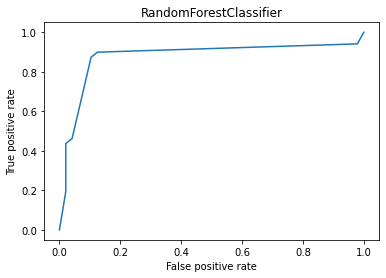

In [250]:
tpr,fpr,thresholds = roc_curve(y_test,pred,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

# Regression Problem

In [251]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,-1.671407,28.1839,-0.930456,6,1.279713,109,1,0.358275,0.362091,0.362609,0.377618
1,1,0.207389,24.7663,-0.513824,1,-0.184895,174,2,0.358275,0.362091,0.362609,0.377618
2,2,-0.287387,21.9038,-2.354133,7,-0.184895,21,2,0.358275,0.362091,0.362609,0.377618
3,3,0.379679,23.8712,2.446285,2,0.493260,22,2,-0.712231,-0.666760,-0.885308,-0.905002
4,4,1.742984,21.9603,1.248396,1,1.779350,22,2,1.859337,1.901743,1.538253,2.078748


In [252]:
data['capacity_mw'].unique()

array([-1.67140651,  0.20738926, -0.28738658,  0.37967855,  1.74298394,
        0.70921254, -0.05738899,  0.56838661,  0.78815024,  0.61625538,
        1.59459749,  0.37568616,  1.53361653, -0.73734944, -1.06822207,
        0.98347816,  1.17208793, -1.01406146, -0.73578505, -0.55162228,
        1.2156758 , -0.20097477, -0.155916  , -1.99795005, -0.75163217,
        0.28691514, -0.65458794, -0.86944746, -1.36020016,  1.25660328,
       -0.46879737,  1.02073109,  0.53387441,  1.46432216,  1.08667497,
        0.00624083,  0.80615529,  0.86469362, -0.91937111,  0.83205065,
       -0.43165756, -0.64922168, -0.25012441,  1.26761887,  0.16149404,
        1.58297262,  0.31639222, -0.00589755,  0.75016716, -0.57912482,
       -0.52543362, -0.70539435,  1.71356479, -0.50864511, -0.26314071,
        1.60558742, -0.80209934, -0.36419493, -0.76794766,  1.07625111,
        0.09796476,  0.06313249,  1.53791748,  0.21285855,  0.02278701,
       -1.27178818,  1.28896602, -0.27647679,  0.48729694,  0.02

In [253]:
data["capacity_mw"].value_counts()

-1.360200    37
 1.172088    20
-0.802099    19
 1.533617    19
-1.014061    19
             ..
 1.357380     1
-0.388526     1
 0.315495     1
-0.602164     1
 0.252689     1
Name: capacity_mw, Length: 330, dtype: int64

In [254]:
data.shape

(835, 12)

In [255]:
data.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,835.000000,8.350000e+02,835.000000,8.350000e+02,835.000000,8.350000e+02,835.000000,835.000000,8.350000e+02,8.350000e+02,8.350000e+02,8.350000e+02
mean,446.483832,-1.599519e-16,21.107093,2.081317e-08,3.288623,1.046668e-15,42.718563,1.724551,3.617864e-16,6.847483e-17,5.571059e-17,-3.058099e-18
std,263.188498,1.000599e+00,6.138324,1.000599e+00,2.315996,1.000599e+00,42.114223,0.686148,1.000599e+00,1.000599e+00,1.000599e+00,1.000599e+00
min,0.000000,-2.407314e+00,8.168900,-2.670552e+00,0.000000,-2.645932e+00,0.000000,0.000000,-2.108990e+00,-2.100609e+00,-2.089351e+00,-2.084080e+00
25%,217.500000,-7.516322e-01,16.924300,-6.094202e-01,1.000000,-1.848953e-01,22.000000,2.000000,-6.277283e-01,-6.353345e-01,-6.582139e-01,-6.858817e-01
50%,443.000000,-1.143242e-01,21.208300,7.192429e-02,3.000000,-1.848953e-01,22.000000,2.000000,3.582752e-01,3.620907e-01,3.626091e-01,3.776184e-01
75%,674.500000,8.860030e-01,25.141650,5.722646e-01,6.000000,3.893762e-01,31.500000,2.000000,3.582752e-01,3.620907e-01,3.626091e-01,3.776184e-01
max,906.000000,1.797130e+00,34.649000,2.492837e+00,7.000000,2.180244e+00,177.000000,2.000000,3.252661e+00,3.147852e+00,2.875152e+00,2.773332e+00


In [256]:
a = data.drop("capacity_mw", axis=1)
b = data["capacity_mw"]

In [257]:
a

,name,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,28.1839,-0.930456,6,1.279713,109,1,0.358275,0.362091,0.362609,0.377618
1,1,24.7663,-0.513824,1,-0.184895,174,2,0.358275,0.362091,0.362609,0.377618
2,2,21.9038,-2.354133,7,-0.184895,21,2,0.358275,0.362091,0.362609,0.377618
3,3,23.8712,2.446285,2,0.493260,22,2,-0.712231,-0.666760,-0.885308,-0.905002
4,4,21.9603,1.248396,1,1.779350,22,2,1.859337,1.901743,1.538253,2.078748
...,...,...,...,...,...,...,...,...,...,...,...
902,902,16.2949,0.213054,1,1.910410,22,2,-2.090864,-1.400855,-0.702621,-0.847059
903,903,12.8932,0.402534,6,-0.184895,77,0,0.358275,0.362091,0.362609,0.377618
904,904,15.2758,-0.240976,7,-0.184895,21,2,0.358275,0.362091,0.362609,0.377618
905,905,24.3500,-0.771409,1,-0.184895,59,2,0.358275,0.362091,0.362609,0.377618


In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(a), columns=x.columns)


In [259]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


,VIF values,Features
0,1.032578,name
1,1.096474,capacity_mw
2,1.339588,latitude
3,1.646855,longitude
4,1.110415,commissioning_year
5,1.560348,source
6,1.974111,geolocation_source
7,5.762815,generation_gwh_2015
8,11.913166,generation_gwh_2016
9,11.576239,generation_gwh_2017


# Lets Build a Model

In [260]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [261]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.48811828680130753
 At random state 0 , the testing accuracy is :- 0.4285875243203052


 At random state 1 , the Training accuracy is :- 0.48802218835059363
 At random state 1 , the testing accuracy is :- 0.4232671745616673


 At random state 2 , the Training accuracy is :- 0.47298241531470453
 At random state 2 , the testing accuracy is :- 0.4875142351784769


 At random state 3 , the Training accuracy is :- 0.48374293947675395
 At random state 3 , the testing accuracy is :- 0.44750447811928995


 At random state 4 , the Training accuracy is :- 0.47020637979863766
 At random state 4 , the testing accuracy is :- 0.4987355044415257


 At random state 5 , the Training accuracy is :- 0.4873995628208252
 At random state 5 , the testing accuracy is :- 0.4302920382180174


 At random state 6 , the Training accuracy is :- 0.464008640425977
 At random state 6 , the testing accuracy is :- 0.5166269201181737


 At random state 7 , the Training ac

Here we can select random state 35

In [263]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=35)

In [264]:
lr.fit(x_train,y_train)

LinearRegression()

In [265]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.4778334435514403


In [266]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.47412394811051894


# Cross Validation of the Model

In [268]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,b,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 3 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 4 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 5 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 6 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 7 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 8 the CV Score is 1.0 and accuracy for training is -0.594317952990371 and accuracy for testing is -0.7135764901072044


At cross fold 9 the CV Score is 1.0 and accuracy for training 

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

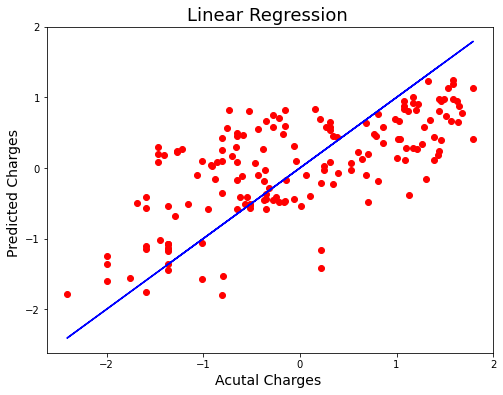

In [269]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [271]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')

lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [272]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.00041069499060686414

In [273]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00041069499060686414)

In [274]:
lasso_reg.score(x_train,y_train)#Testing Score

0.4778188611016523

In [275]:
lasso_reg.score(x_test,y_test) #Testing Score

0.4747436613454413

# Using Ridge Regression Model

In [276]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [277]:
ridgecv.alpha_

0.040999999999999995

In [278]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.040999999999999995)

In [279]:
ridge_model.score(x_train,y_train)#Training Score

0.4778334399536064

In [280]:
ridge_model.score(x_test,y_test)#Testing Score

0.4741317886923486

# Model Evaluation

In [281]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [282]:
y_pred=ridge_model.predict(x_test)

In [283]:
#MAE
mean_absolute_error(y_test,y_pred)

0.6215459722602255

In [284]:
#MSE
mean_squared_error(y_test,y_pred)

0.5741258698433338

In [285]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.7577109408233023

# Lets Plot With Decision Tree Regressor

In [286]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [287]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.6926924790119622


 At random state 1 , the Training accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.6743578049221237


 At random state 2 , the Training accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.5611842042183683


 At random state 3 , the Training accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.6202138656636733


 At random state 4 , the Training accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.7709089408613528


 At random state 5 , the Training accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.6813484230248317


 At random state 6 , the Training accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.7222273980196976


 At random state 7 , the Training accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.4793057492779895


 At random state 8 , the

Here we select random state 82

In [289]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=82)

In [290]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [291]:
#Lets Print Training Score
pred_train=dt.predict(x_train)
print(r2_score(y_train,pred_train))

1.0


In [292]:
#Lets Print Testing Score
train_pred=dt.predict(x_test)
print(r2_score(y_test,train_pred))

0.8045145280677839


# Cross Validation of the Model

In [293]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,a,b,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.5834165780419068 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 3 the CV Score is 0.611675423589037 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 4 the CV Score is 0.6491365120887077 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 5 the CV Score is 0.593090607822767 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 6 the CV Score is 0.5715407373183415 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 7 the CV Score is 0.5818324818273533 and accuracy for training is -0.9528687415623862 and accuracy for testing is -1.1459843035357835


At cross fold 8 the CV Score is 0.6111131316815421 and accuracy for training is -0.9528687415623862 an

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

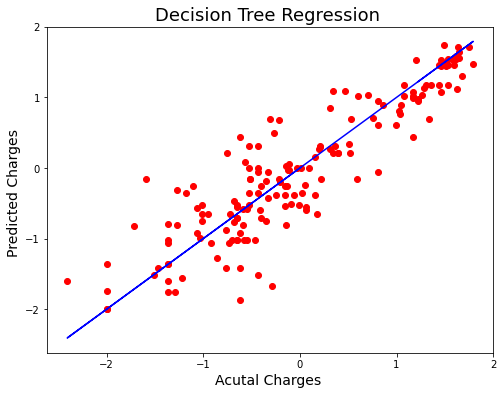

In [294]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Decision Tree Regression ",fontsize=18)
plt.savefig('dt.png')
plt.show()

# Lets Plot With Random Forest

In [295]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [301]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9695044020490179
 At random state 0 , the testing accuracy is :- 0.8395302123159969


 At random state 1 , the Training accuracy is :- 0.9725153558179287
 At random state 1 , the testing accuracy is :- 0.8027593506141071


 At random state 2 , the Training accuracy is :- 0.971916989438227
 At random state 2 , the testing accuracy is :- 0.8059724201498627


 At random state 3 , the Training accuracy is :- 0.9728363664799022
 At random state 3 , the testing accuracy is :- 0.7920021672197176


 At random state 4 , the Training accuracy is :- 0.9718580367749629
 At random state 4 , the testing accuracy is :- 0.839282286094866


 At random state 5 , the Training accuracy is :- 0.9737444520035914
 At random state 5 , the testing accuracy is :- 0.7710184335277948


 At random state 6 , the Training accuracy is :- 0.9700563877788213
 At random state 6 , the testing accuracy is :- 0.8653550006724361


 At random state 7 , the Training accuracy 

In [ ]:
Here we select random state 42

In [302]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [303]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [304]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9704355996947545


In [305]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.8605922471581169


# Cross Validation of the Model

In [306]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,a,b,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.7435918911079262 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 3 the CV Score is 0.7769389227001066 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 4 the CV Score is 0.7854378267653361 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 5 the CV Score is 0.7883512556837647 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 6 the CV Score is 0.7785021541547114 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 7 the CV Score is 0.7686663338096186 and accuracy for training is -0.8570293096037851 and accuracy for testing is -0.7357392707117589


At cross fold 8 the CV Score is 0.7858914536022191 and accuracy for training is -0.8570293096037851 

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

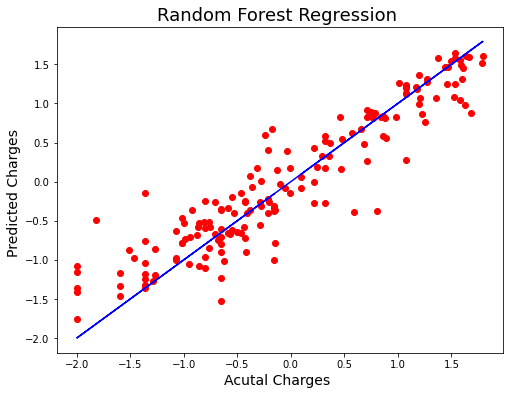

In [307]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Random Forest Regression ",fontsize=18)
plt.savefig('rf.png')
plt.show()

# hyperparameter tuning.

In [308]:
parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(10,15),
          'min_samples_split':range(9,10),
          'min_samples_leaf':range(5,6)}

In [309]:
rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 9}


In [311]:
rf=RandomForestRegressor(criterion='mse',max_features='log2',max_depth=11,min_samples_leaf=5,min_samples_split=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,a,b,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

R2 Score 84.02285748866079
Cross Val Score 79.09505630492968


# Lets Save Our Model

In [312]:
import pickle
filename='Global.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [313]:
loaded_model=pickle.load(open('Global','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.02285748866079


In [314]:
# batch  No - ds0522
# Data Trained